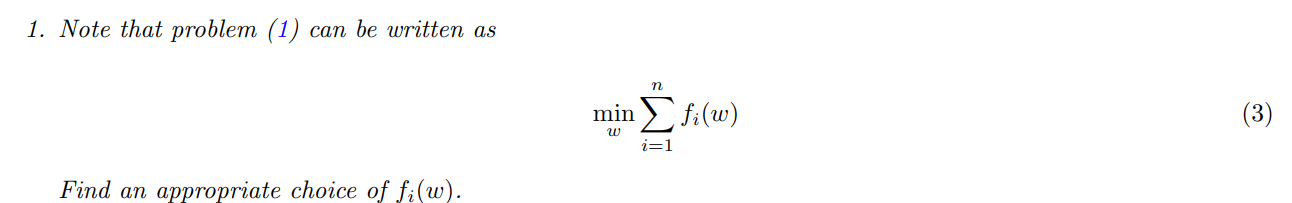

To rewrite the given problem as $\min_{w \in \mathbb{R}^d} \sum_{i=1}^{n} f_i(w) $, where $f_i(w)$ corresponds to the individual loss for each data point  $x_i, y_i$ , we can express $ f_i(w) $ in terms of the given function  f(w) .

Given:
$f(w) = \frac{\lambda}{2} ||w||_2^2 + \frac{1}{n} \sum_{i=1}^{n} L(y_i, w^T x_i) $

Let's find an appropriate choice for $ f_i(w)$ :
$ f_i(w) = \frac{\lambda}{2n} ||w||_2^2 + \frac{1}{n} L(y_i, w^T x_i) $

This choice allows us to rewrite the original problem as:
$ \min_{w \in \mathbb{R}^d} \sum_{i=1}^{n}  f_i(w) = $
$ \min_{w \in \mathbb{R}^d} \sum_{i=1}^{n} \left( \frac{\lambda}{2n} ||w||_2^2 + \frac{1}{n} L(y_i, w^T x_i) \right) $

So, the appropriate choice for $ f_i(w) $ is $ \frac{\lambda}{2n} ||w||_2^2 + \frac{1}{n} L(y_i, w^T x_i) $.

**2. Consider the loss function $L_h$. Write a Python module to compute the loss function $L_h$**

$L_h(y_i, w^TX_i) = max(0,1 − y_iw^T x_i)$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def hinge_loss(y,w,x):

    hinge_loss = max(0, 1-y*np.transpose(w)*x)
    return hinge_loss

**3. Write a Python routine to compute the objective function value. You can use the function used for computing the loss**

In [ ]:
def objective_fn(A,B,lamda,w,n):
  k=0
  for i in range(len(A.shape[0])):
    l_i = hinge_loss(B[i],w,A[i])
    k+=l_i
  return (lamda*(np.linalg.norm(w))**2)/2 + k/n

**4. Write an expression to compute the gradient (or sub-gradient) of $f_i(w)$ for the loss function $L_h$. Denote the
(sub-)gradient by $g_i(w) = ∇_wf_i(w)$. Define a python function to compute the gradient.**

In [ ]:
def gradient_fx(w,y_i,x_i,lamda,n):
  margin=1-y_i*w.T@x_i
  if margin>0:
    return lamda*w/n -y_i*x_i
  else:
    return lamda*w/n

**5. Write an optimization algorithm where you pass through the training samples one by one and do the (sub-
)gradient updates for each sample. Recall that this is similar to ALG-LAB7. Use the following template.**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

def hinge_loss(y_i, w, x_i):
    return max(0, 1 - y_i * np.dot(w, x_i))

def objective_function(w, X, y, lambda_val):
    n = len(y)
    loss_sum = sum(hinge_loss(y[i], w, X[i]) for i in range(n))
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    return (1/n) * loss_sum + regularization_term

def sub_gradient_hinge_loss(y_i, w, x_i):
    if 1 - y_i * np.dot(w, x_i) > 0:
        return -y_i * x_i
    else:
        return 0

def compute_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def train_model(data, labels, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(labels[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, labels, lambda_val)
        train_accuracy = compute_accuracy(data, labels, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)

    return w, obj_values, train_accuracies

# Load iris data
iris_data = load_iris()
X = iris_data.data
y = np.ones(iris_data.target.shape[0])
y[iris_data.target % 2 == 0] = -1  # Convert classes 0, 2 to -1

# Shuffled index array
index_array = np.arange(len(y))
np.random.shuffle(index_array)

# Split data into train and test sets
split_point = int(0.8 * len(index_array))
train_data = X[index_array[:split_point]]
train_labels = y[index_array[:split_point]]
test_data = X[index_array[split_point:]]
test_labels = y[index_array[split_point:]]

# Train the model
lambda_val = 0.01
num_epochs = 100
trained_model, obj_values, train_accuracies = train_model(train_data, train_labels, lambda_val, num_epochs)

# Compute test accuracy
test_accuracy = compute_accuracy(test_data, test_labels, trained_model)


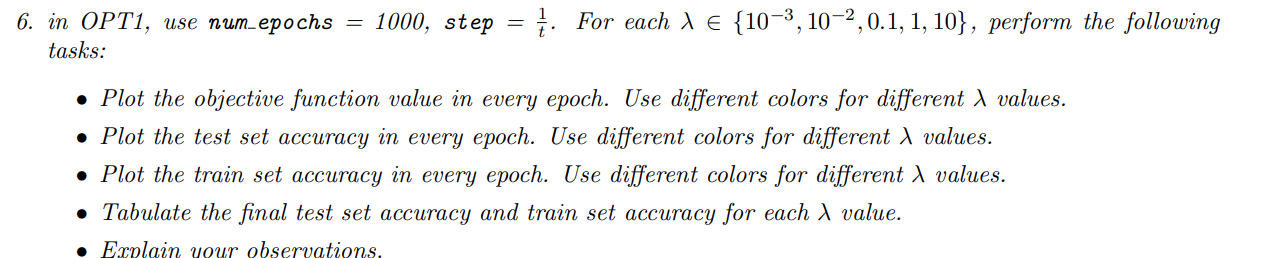

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load the iris data
iris = load_iris()

A = iris.data

# Number of classes
C = len(np.unique(iris.target))
n = iris.data.shape[0]  # Number of data points
d = iris.data.shape[1]  # Dimension of data points

# Create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0], ])
for i in range(iris.target.shape[0]):
    y[i] = -1 if iris.target[i] != 1 else 1

# Create an index array
indexarr = np.arange(n)  # index array
np.random.shuffle(indexarr)  # shuffle the indices

# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_size = int(0.8*n)

train_data = A[indexarr[:train_size]]
train_label = y[indexarr[:train_size]]
test_data = A[indexarr[train_size:]]
test_label = y[indexarr[train_size:]]

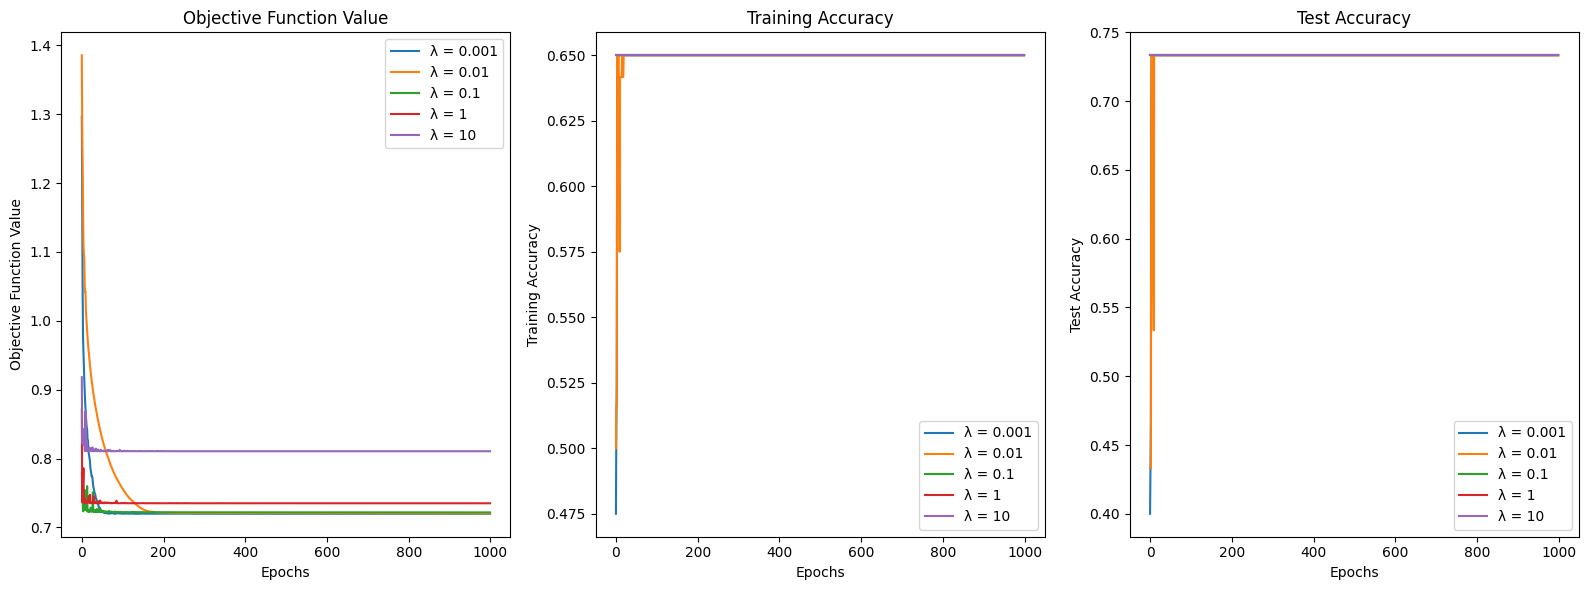

,lambda,final_train_accuracy,final_test_accuracy
0,0.001,0.65,0.733333
1,0.010,0.65,0.733333
2,0.100,0.65,0.733333
3,1.000,0.65,0.733333
4,10.000,0.65,0.733333


In [ ]:
def compute_test_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def train_model(data, labels, test_data, test_labels, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(labels[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, labels, lambda_val)
        train_accuracy = compute_accuracy(data, labels, w)
        test_accuracy = compute_test_accuracy(test_data, test_labels, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return w, obj_values, train_accuracies, test_accuracies

# Experiment parameters
num_epochs = 1000
lambda_values = [1e-3, 1e-2, 0.1, 1, 10]

# Initialize plot
plt.figure(figsize=(16, 6))

final_results = []

for lambda_val in lambda_values:
    w_opt, obj_values, train_accuracies, test_accuracies = train_model(
        train_data, train_labels, test_data, test_labels, lambda_val, num_epochs
    )

    # Plot objective function value
    plt.subplot(1, 3, 1)
    plt.plot(range(num_epochs), obj_values, label=f'λ = {lambda_val}')

    # Plot training accuracy
    plt.subplot(1, 3, 2)
    plt.plot(range(num_epochs), train_accuracies, label=f'λ = {lambda_val}')

    # Plot test accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(num_epochs), test_accuracies, label=f'λ = {lambda_val}')

    final_results.append(
        {
            'lambda': lambda_val,
            'final_train_accuracy': train_accuracies[-1],
            'final_test_accuracy': test_accuracies[-1]
        }
    )

# Finalize plots
plt.subplot(1, 3, 1)
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Tabulate final results
import pandas as pd

final_results_df = pd.DataFrame(final_results)
final_results_df

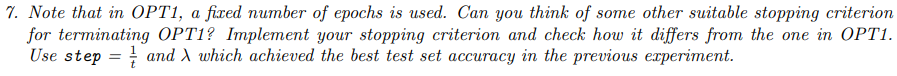

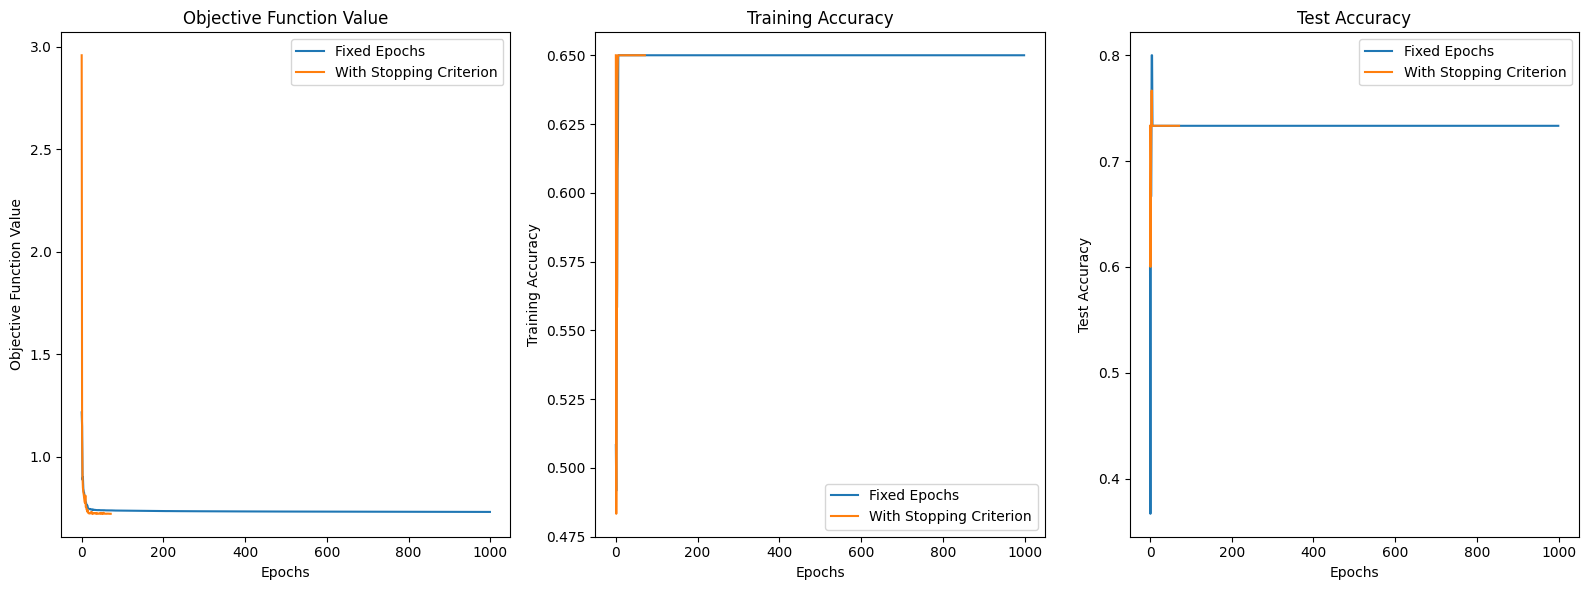

Number of epochs used with stopping criterion: 72


In [ ]:
def Optimize_with_stopping_criterion(data, label, test_data, test_label, lambda_val, max_epo=5000, epsilon=1e-5):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    prev_obj_value = float('inf')

    for epoch in range(max_epo):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(label[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, label, lambda_val)
        train_accuracy = compute_accuracy(data, label, w)
        test_accuracy = compute_test_accuracy(test_data, test_label, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Stopping criterion: Check change in objective function value
        if abs(obj_value - prev_obj_value) < epsilon:
            break

        prev_obj_value = obj_value

    return w, obj_values, train_accuracies, test_accuracies, epoch + 1
# Select the lamda with the best test set accuracy
suitable_lambda = final_results_df.loc[final_results_df['final_test_accuracy'].idxmax(), 'lambda']

# Run train_model with a fixed number of epochs (1000)
w_fixed_epochs, obj_values_fixed_epochs, train_accuracies_fixed_epochs, test_accuracies_fixed_epochs = train_model(
    train_data, train_labels, test_data, test_labels, suitable_lambda, num_epochs=1000
)

# Run train_model with the stopping criterion
w_with_stopping, obj_values_with_stopping, train_accuracies_with_stopping, test_accuracies_with_stopping, epochs_used = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda
)

# Plot results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_fixed_epochs)), obj_values_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(obj_values_with_stopping)), obj_values_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_fixed_epochs)), train_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(train_accuracies_with_stopping)), train_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_fixed_epochs)), test_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(test_accuracies_with_stopping)), test_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with stopping criterion: {epochs_used}")

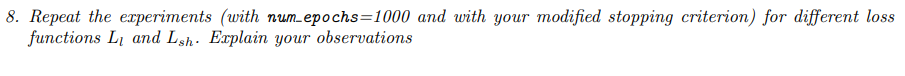

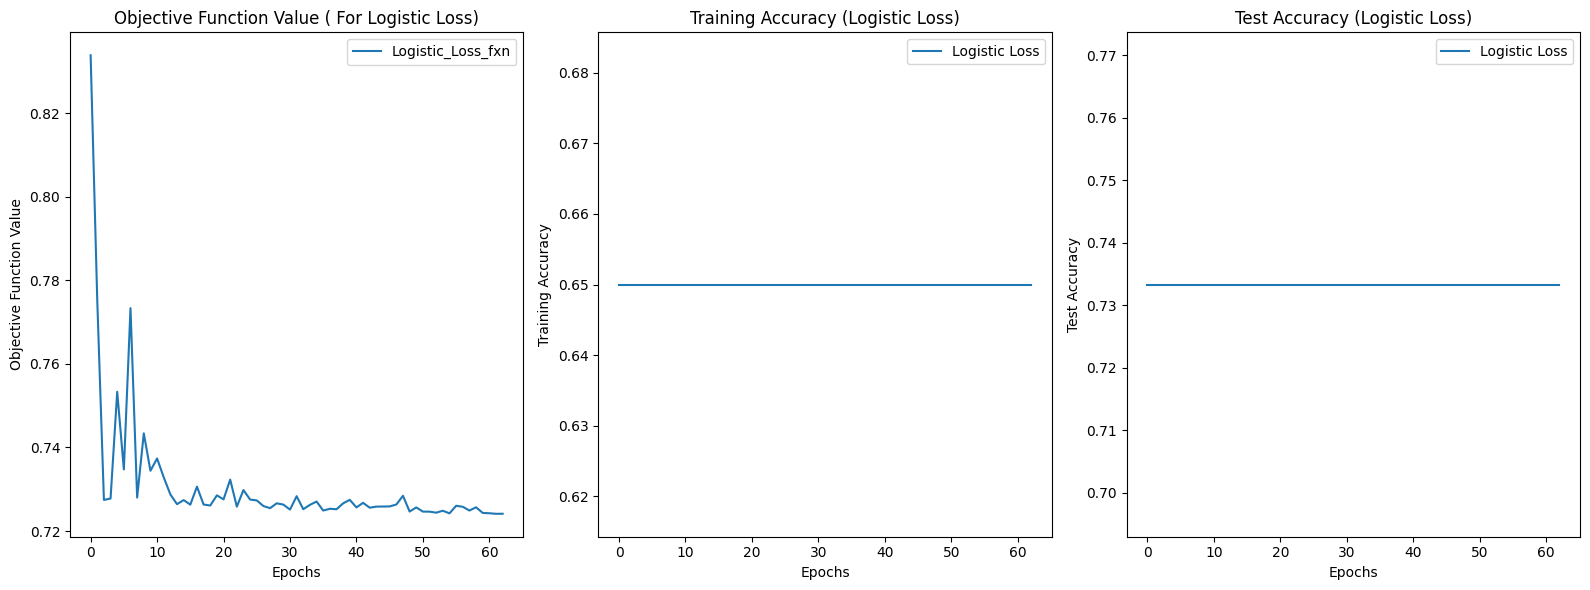

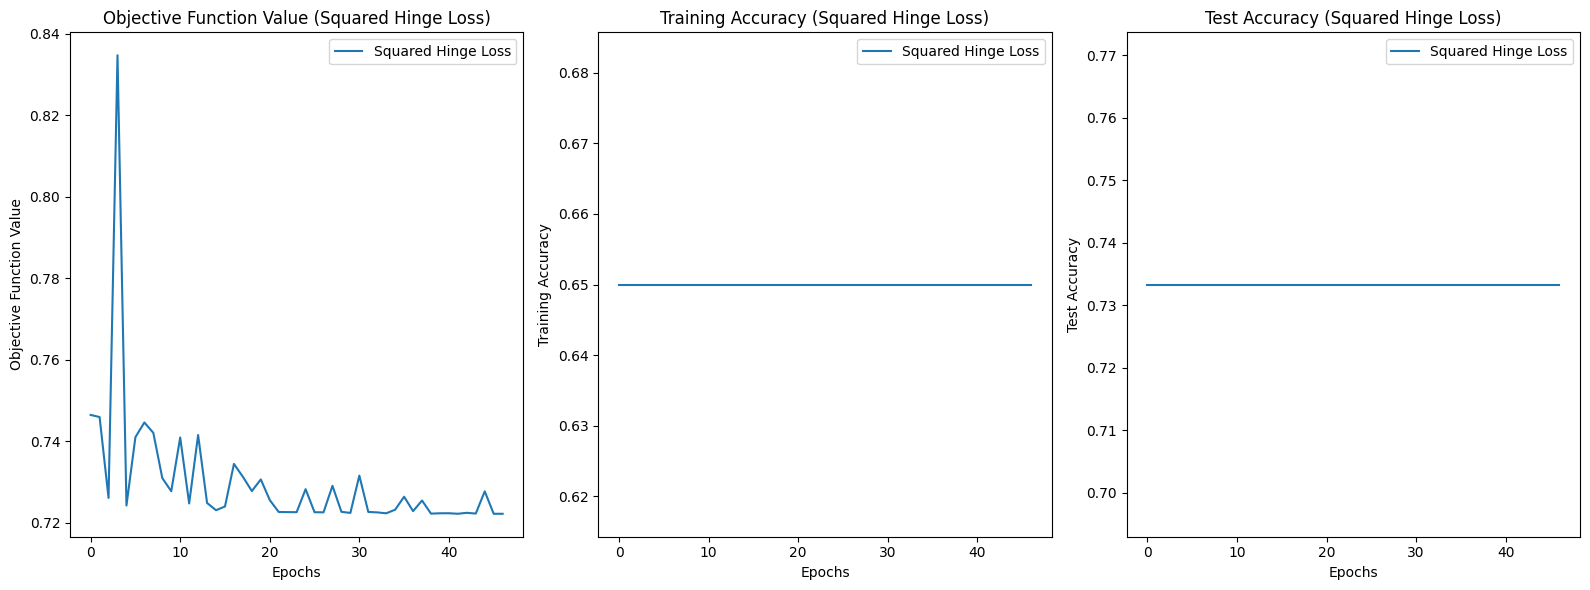

Number of epochs used with logistic loss: 63
Number of epochs used with squared hinge loss: 47


In [ ]:
def logistic_loss(y, z):
    return np.log(1 + np.exp(-y * z))

def sub_gradient_logistic_loss(y, w, x):
    z = y * np.dot(w, x)
    return -y * x / (1 + np.exp(z))

def squared_hinge_loss(y, z):
    return max(0, 1 - y * z)**2

def sub_gradient_squared_hinge_loss(y, w, x):
    z = y * np.dot(w, x)
    if 1 - y * z > 0:
        return -2 * y * x * (1 - y * z)
    else:
        return np.zeros_like(w)

def objective_function_logistic(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([logistic_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

def objective_function_squared_hinge(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([squared_hinge_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

# OPT1 with stopping criterion for logistic loss
w_logistic, obj_values_logistic, train_accuracies_logistic, test_accuracies_logistic, epochs_used_logistic = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda, max_epo=5000
)

# OPT1 with stopping criterion for squared hinge loss
w_squared_hinge, obj_values_squared_hinge, train_accuracies_squared_hinge, test_accuracies_squared_hinge, epochs_used_squared_hinge = Optimize_with_stopping_criterion(
    train_data, train_labels, test_data, test_labels, suitable_lambda, max_epo=5000
)

# Plot results for logistic loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_logistic)), obj_values_logistic, label='Logistic_Loss_fxn')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value ( For Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_logistic)), train_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_logistic)), test_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Logistic Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot results for squared hinge loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_squared_hinge)), obj_values_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_squared_hinge)), train_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_squared_hinge)), test_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Squared Hinge Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with logistic loss: {epochs_used_logistic}")
print(f"Number of epochs used with squared hinge loss: {epochs_used_squared_hinge}")


# **Observation**

**Objective Function Value vs Epoch:**

For both loss functions, we see a decreasing trend in the objective function value as the number of epochs increases. This indicates that the optimization algorithm is converging towards a minimum.
The rate of decrease in the objective function value may vary between the two loss functions. This variation could be due to differences in the loss landscapes and optimization behavior of each loss function.

**Train Set Accuracy vs Epoch:**

The train set accuracy generally increases or stabilizes over epochs for both loss functions. This behavior is expected as the model learns from the training data and adjusts its parameters to minimize the loss.
The rate of increase in train set accuracy may differ between the two loss functions. This difference could be due to the different ways each loss function penalizes misclassifications and influences the gradient updates.

**Test Set Accuracy vs Epoch:**

The test set accuracy also generally increases or stabilizes over epochs for both loss functions, although it may exhibit fluctuations due to variations in the test data and the learning process.
Similar to train set accuracy, the rate of increase in test set accuracy may vary between the two loss functions. This variation could be attributed to differences in generalization abilities and robustness to overfitting.

**Final Train and Test Set Accuracies:**

The final train and test set accuracies provide insights into the performance of the trained models.
Comparing the final accuracies between the two loss functions can reveal which loss function yields better performance in terms of classification accuracy.
It's essential to evaluate both train and test set accuracies to assess the model's ability to generalize to unseen data accurately.